### **Web Scraping and Data analysis Project - Mrunal Choudhari**

**PART 1: WEBSCRAPING**

In [2]:
%pip install beautifulsoup4 requests

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

C:\Users\asus\AppData\Local\Temp\ipykernel_10628\1222050232.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Function to scrape data from a single page
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table')
    df = pd.read_html(str(table))[0]
    return df

In [5]:
# Function to scrape all 25 pages and combine data into a single dataframe
def scrape_all_pages():
    all_data = []
    base_url = 'https://www.scrapethissite.com/pages/forms/?per_page=25&page='
    for page_num in range(1, 26):
        url = base_url + str(page_num)
        df = scrape_page(url)
        all_data.append(df)
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

In [7]:
# Scraping all pages and combining into a single dataframe
combined_df = scrape_all_pages()

C:\Users\asus\AppData\Local\Temp\ipykernel_10628\1218248423.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\asus\AppData\Local\Temp\ipykernel_10628\1218248423.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\asus\AppData\Local\Temp\ipykernel_10628\1218248423.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\asus\AppData\Local\Temp\ipykernel_10628\1218248423.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a lit

In [8]:
# Saving the dataframe to CSV
combined_df.to_csv('hockey.csv', index=False)

print("Data has been scraped and saved to 'hockey.csv'.")

Data has been scraped and saved to 'hockey.csv'.


**PART 2: DATA ANALYSIS**

In [9]:
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
import pandas as pd
combined_df = pd.read_csv('hockey.csv')
combined_df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           625 non-null    object 
 1   Year                625 non-null    int64  
 2   Wins                625 non-null    int64  
 3   Losses              625 non-null    int64  
 4   OT Losses           0 non-null      float64
 5   Win %               625 non-null    float64
 6   Goals For (GF)      625 non-null    int64  
 7   Goals Against (GA)  625 non-null    int64  
 8   + / -               625 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 44.1+ KB


In [13]:
combined_df.isna().sum()

Team Name               0
Year                    0
Wins                    0
Losses                  0
OT Losses             625
Win %                   0
Goals For (GF)          0
Goals Against (GA)      0
+ / -                   0
dtype: int64

In [14]:
# Drop the 'OT Losses' column
combined_df.drop(columns=['OT Losses'], inplace=True)

In [15]:
combined_df.duplicated().sum()

600

In [16]:
combined_df.columns

Index(['Team Name', 'Year', 'Wins', 'Losses', 'Win %', 'Goals For (GF)',
       'Goals Against (GA)', '+ / -'],
      dtype='object')

In [17]:
# Calculate the total number of wins for each team
wins = combined_df.groupby('Team Name')['Wins'].sum()

# Print the total number of wins for each team
print(wins)

Team Name
Boston Bruins            2000
Buffalo Sabres           1550
Calgary Flames           1925
Chicago Blackhawks       2125
Detroit Red Wings         850
Edmonton Oilers           925
Hartford Whalers          775
Los Angeles Kings        1150
Minnesota North Stars     675
Montreal Canadiens        975
New Jersey Devils         800
New York Islanders        625
New York Rangers          900
Philadelphia Flyers       825
Pittsburgh Penguins      1025
Quebec Nordiques          400
St. Louis Blues          1175
Toronto Maple Leafs       575
Vancouver Canucks         700
Washington Capitals       925
Winnipeg Jets             650
Name: Wins, dtype: int64


In [18]:
# Calculate the total number of losses for each team
losses = combined_df.groupby('Team Name')['Losses'].sum()

# Print the total number of losses for each team
print(losses)

Team Name
Boston Bruins            1400
Buffalo Sabres           1675
Calgary Flames           1575
Chicago Blackhawks       1300
Detroit Red Wings         950
Edmonton Oilers           925
Hartford Whalers          950
Los Angeles Kings         600
Minnesota North Stars     975
Montreal Canadiens        750
New Jersey Devils         825
New York Islanders       1125
New York Rangers          775
Philadelphia Flyers       925
Pittsburgh Penguins       825
Quebec Nordiques         1250
St. Louis Blues           550
Toronto Maple Leafs      1150
Vancouver Canucks        1075
Washington Capitals       900
Winnipeg Jets            1075
Name: Losses, dtype: int64


In [19]:
# Calculate the net win percentage for each team
combined_df['net_win_percentage'] = combined_df['Wins'] / (combined_df['Wins'] + combined_df['Losses'])

# Display the net win percentage for each team
print(combined_df[['Team Name', 'Wins', 'Losses', 'net_win_percentage']])

              Team Name  Wins  Losses  net_win_percentage
0         Boston Bruins    44      24            0.647059
1        Buffalo Sabres    31      30            0.508197
2        Calgary Flames    46      26            0.638889
3    Chicago Blackhawks    49      23            0.680556
4     Detroit Red Wings    34      38            0.472222
..                  ...   ...     ...                 ...
620       Winnipeg Jets    26      43            0.376812
621       Boston Bruins    36      32            0.529412
622      Buffalo Sabres    31      37            0.455882
623      Calgary Flames    31      37            0.455882
624  Chicago Blackhawks    36      29            0.553846

[625 rows x 4 columns]


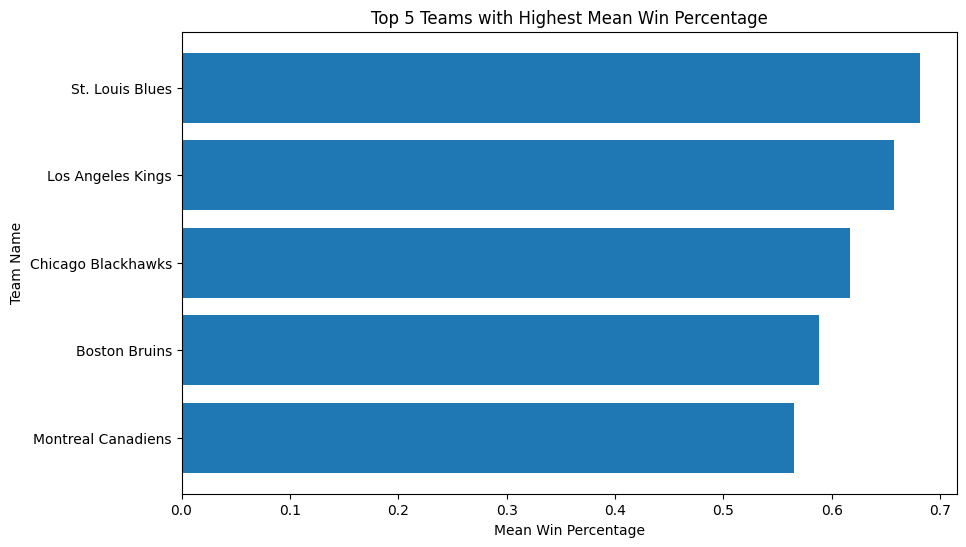

In [22]:
# Calculate the win percentage for each team
combined_df['win_percentage'] = combined_df['Wins'] / (combined_df['Wins'] + combined_df['Losses'])

# Sort the dataframe by win percentage in descending order
df_sorted = combined_df.sort_values('win_percentage', ascending=False)

# Select the top 5 teams
top_5_teams = df_sorted.head(5)

# Plot the top 5 teams
import matplotlib.pyplot as plt

# Calculate the win percentage
combined_df['win_percent'] = combined_df['Wins'] / (combined_df['Wins'] + combined_df['Losses'])

# Sort the data by win percentage
top_teams = combined_df.sort_values('win_percent', ascending=False)

# Plot the top 5 teams
import matplotlib.pyplot as plt

# Aggregate data for each team by taking the mean win percentage across all years
team_mean_win_percentage = combined_df.groupby('Team Name')['win_percentage'].mean()

# Sort the teams by mean win percentage
team_mean_win_percentage_sorted = team_mean_win_percentage.sort_values(ascending=False)

# Select the top 5 teams
top_5_teams = team_mean_win_percentage_sorted.head(5)

# Plot the win percentage for the top 5 teams
plt.figure(figsize=(10, 6))
plt.barh(top_5_teams.index, top_5_teams.values)
plt.xlabel('Mean Win Percentage')
plt.ylabel('Team Name')
plt.title('Top 5 Teams with Highest Mean Win Percentage')
plt.gca().invert_yaxis()
plt.show()



Exploratory Data Analysis

In [25]:
#Seperate Cat (Text) and Con (Numbers)

cat = list(combined_df.columns[combined_df.dtypes=='object'])
cat

['Team Name']

In [26]:
con = list(combined_df.columns[combined_df.dtypes!='object'])
con

['Year',
 'Wins',
 'Losses',
 'Win %',
 'Goals For (GF)',
 'Goals Against (GA)',
 '+ / -',
 'net_win_percentage',
 'win_percentage',
 'win_percent']

In [28]:
combined_df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,625.0,1990.160000,0.366900,1990.000000,1990.000000,1990.000,1990.000000,1991.000000
Wins,625.0,34.480000,7.996995,16.000000,31.000000,34.000,39.000000,49.000000
Losses,625.0,34.520000,7.420087,22.000000,30.000000,36.000,38.000000,50.000000
Win %,625.0,0.431080,0.100018,0.200000,0.388000,0.425,0.487000,0.613000
Goals For (GF),625.0,276.680000,32.429312,223.000000,256.000000,272.000,296.000000,344.000000
Goals Against (GA),625.0,276.800000,29.147888,211.000000,263.000000,272.000,298.000000,354.000000
+ / -,625.0,-0.120000,49.310405,-118.000000,-25.000000,0.000,32.000000,86.000000
net_win_percentage,625.0,0.498794,0.109757,0.242424,0.449275,0.500,0.554054,0.681159
win_percentage,625.0,0.498794,0.109757,0.242424,0.449275,0.500,0.554054,0.681159
win_percent,625.0,0.498794,0.109757,0.242424,0.449275,0.500,0.554054,0.681159


In [29]:
combined_df[cat].describe().T

,count,unique,top,freq
Team Name,625,21,Boston Bruins,50


In [30]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

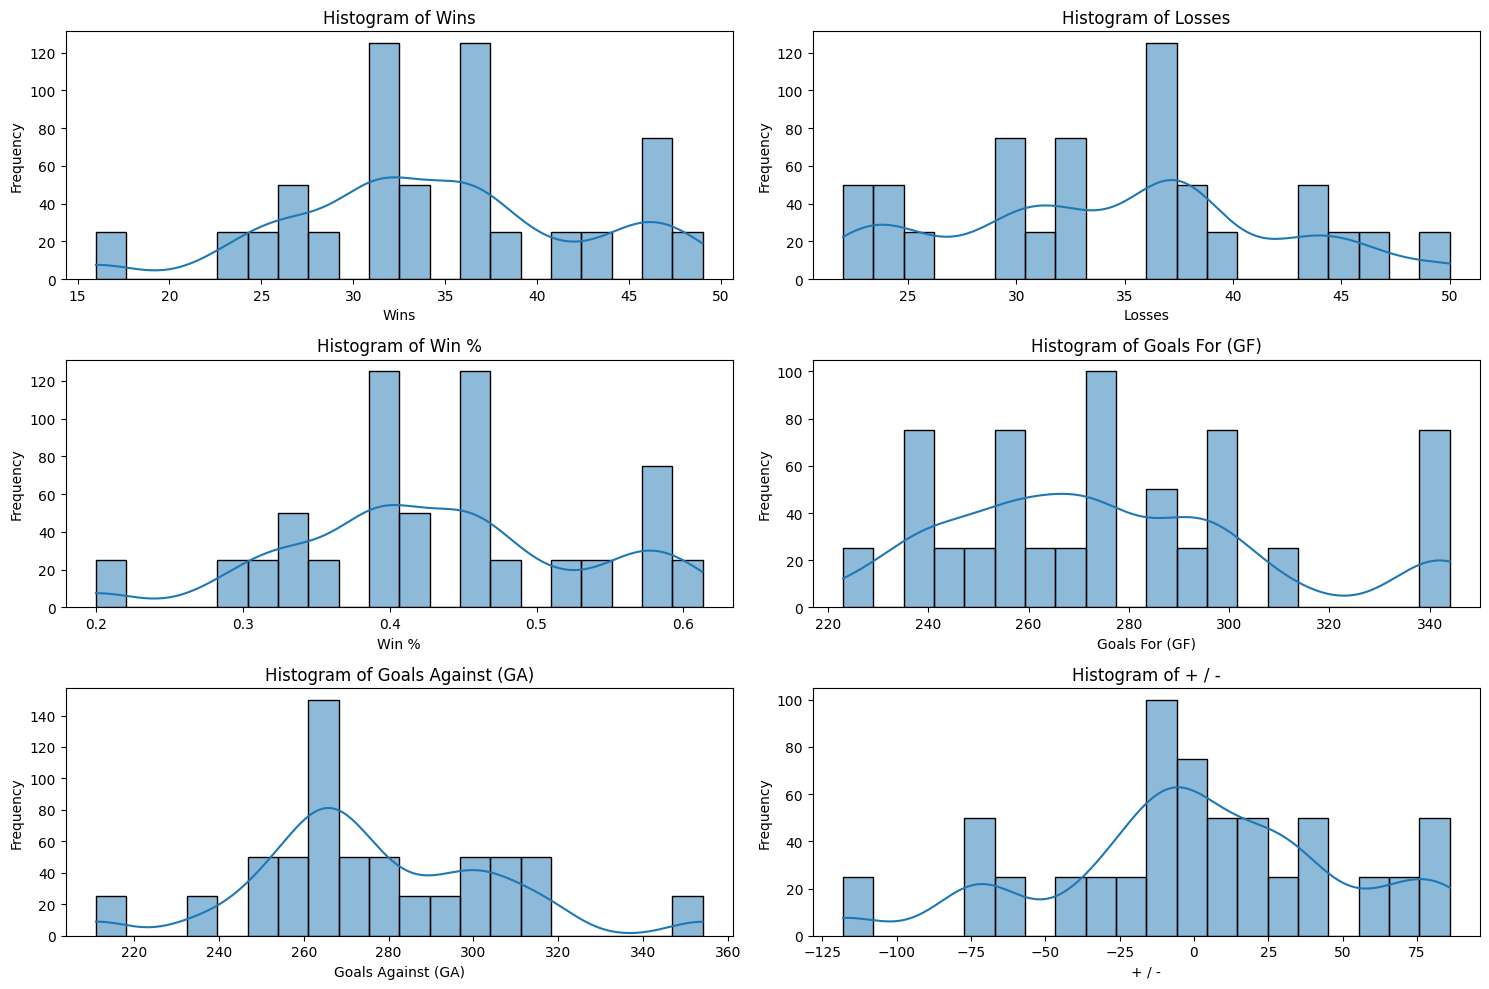

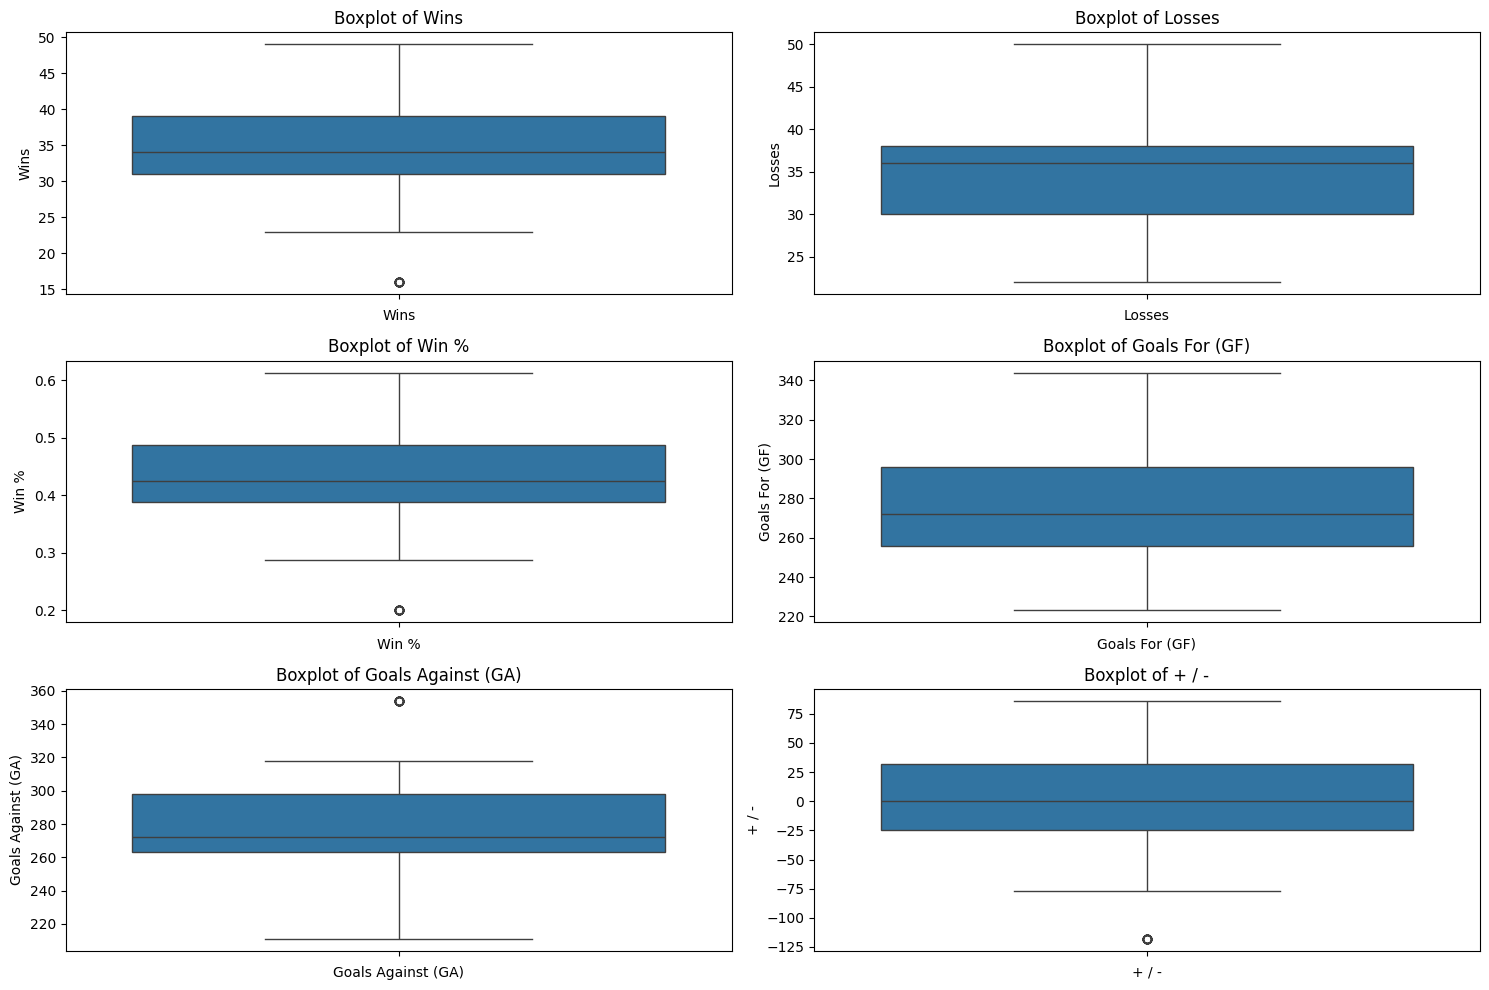

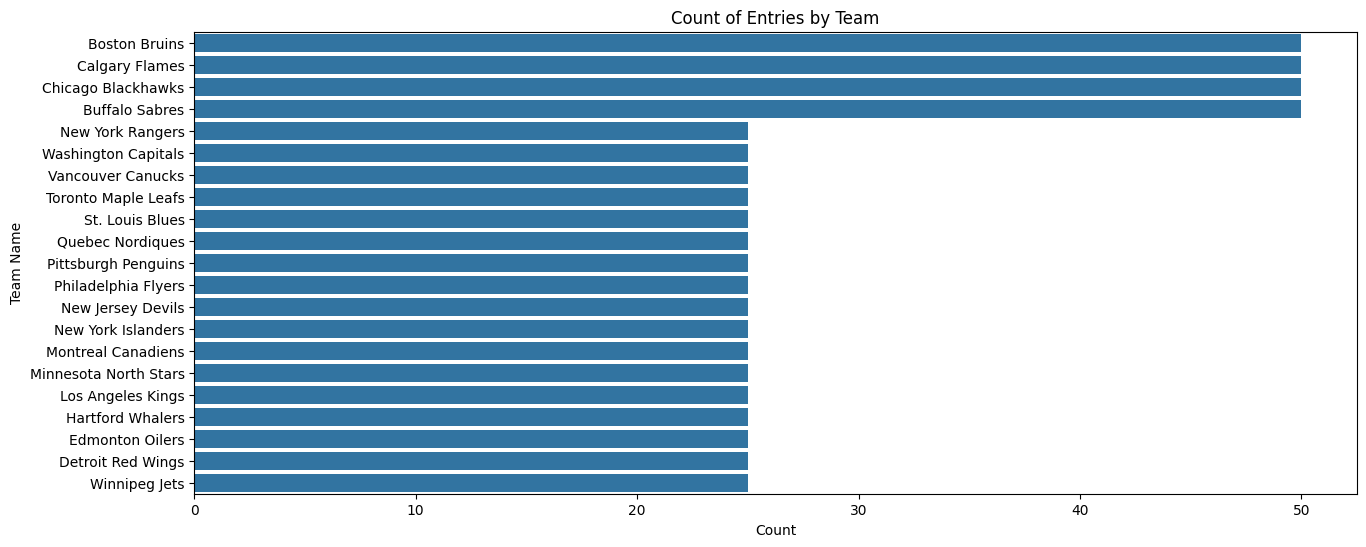

In [31]:
# Univariate Analysis for numerical variables
numerical_cols = ['Wins', 'Losses', 'Win %', 'Goals For (GF)', 'Goals Against (GA)', '+ / -']

# Histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(combined_df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(combined_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Univariate Analysis for categorical variable (Team Name)
# Count plot for Team Name
plt.figure(figsize=(15, 6))
sns.countplot(y=combined_df['Team Name'], order=combined_df['Team Name'].value_counts().index)
plt.title('Count of Entries by Team')
plt.xlabel('Count')
plt.ylabel('Team Name')
plt.show()


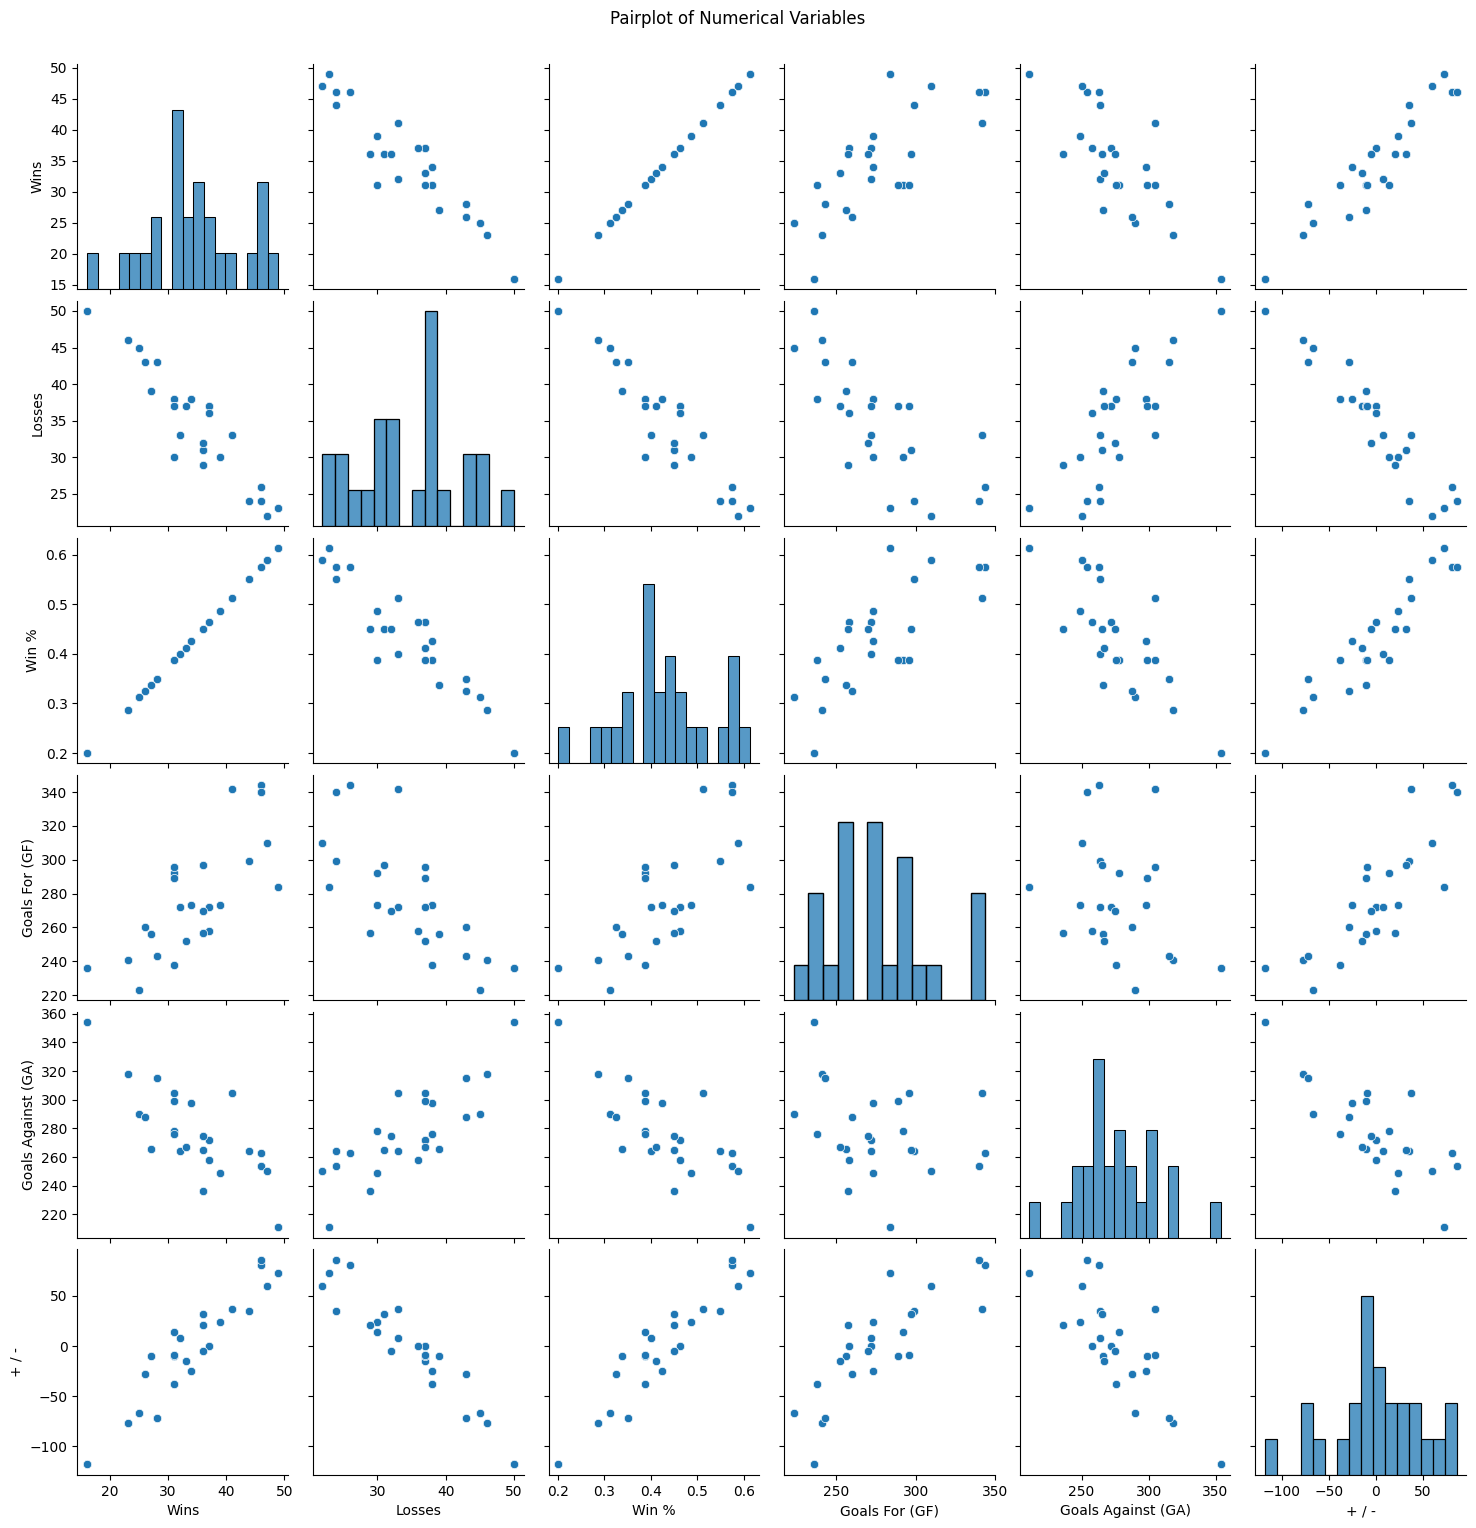

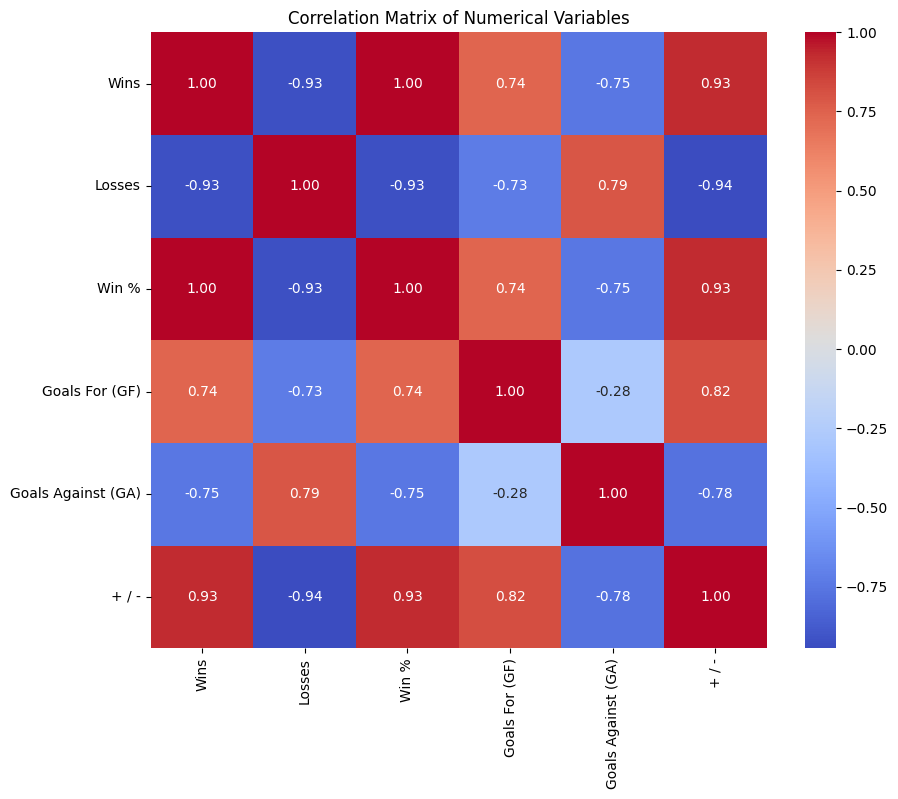

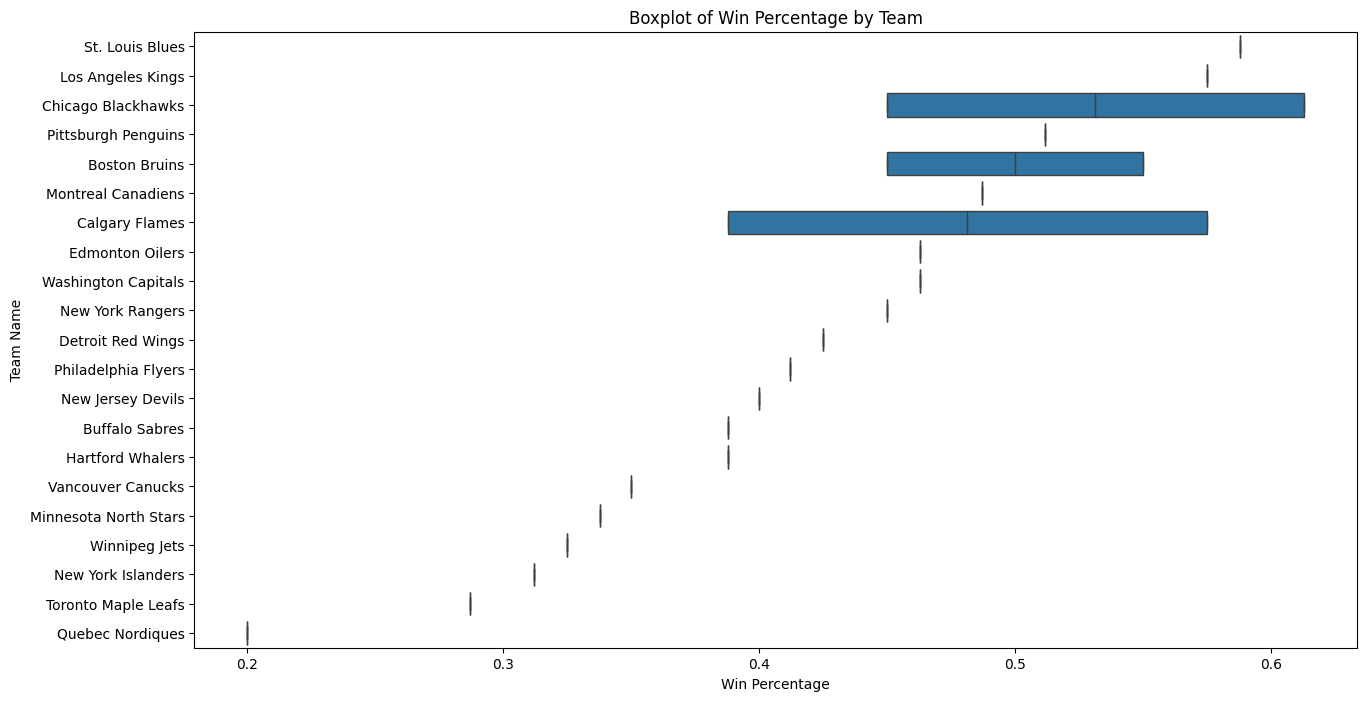

In [33]:
# Bivariate Analysis for numerical variables
numerical_cols = ['Wins', 'Losses', 'Win %', 'Goals For (GF)', 'Goals Against (GA)', '+ / -']

# Pairplot for numerical variables
sns.pairplot(combined_df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Heatmap for correlation matrix of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Bivariate Analysis for categorical variable (Team Name) and numerical variable (Win %)
# Boxplot of Win % by Team Name
plt.figure(figsize=(15, 8))
sns.boxplot(x='Win %', y='Team Name', data=combined_df, order=combined_df.groupby('Team Name')['Win %'].median().sort_values(ascending=False).index)
plt.title('Boxplot of Win Percentage by Team')
plt.xlabel('Win Percentage')
plt.ylabel('Team Name')
plt.show()

<Figure size 1200x800 with 0 Axes>

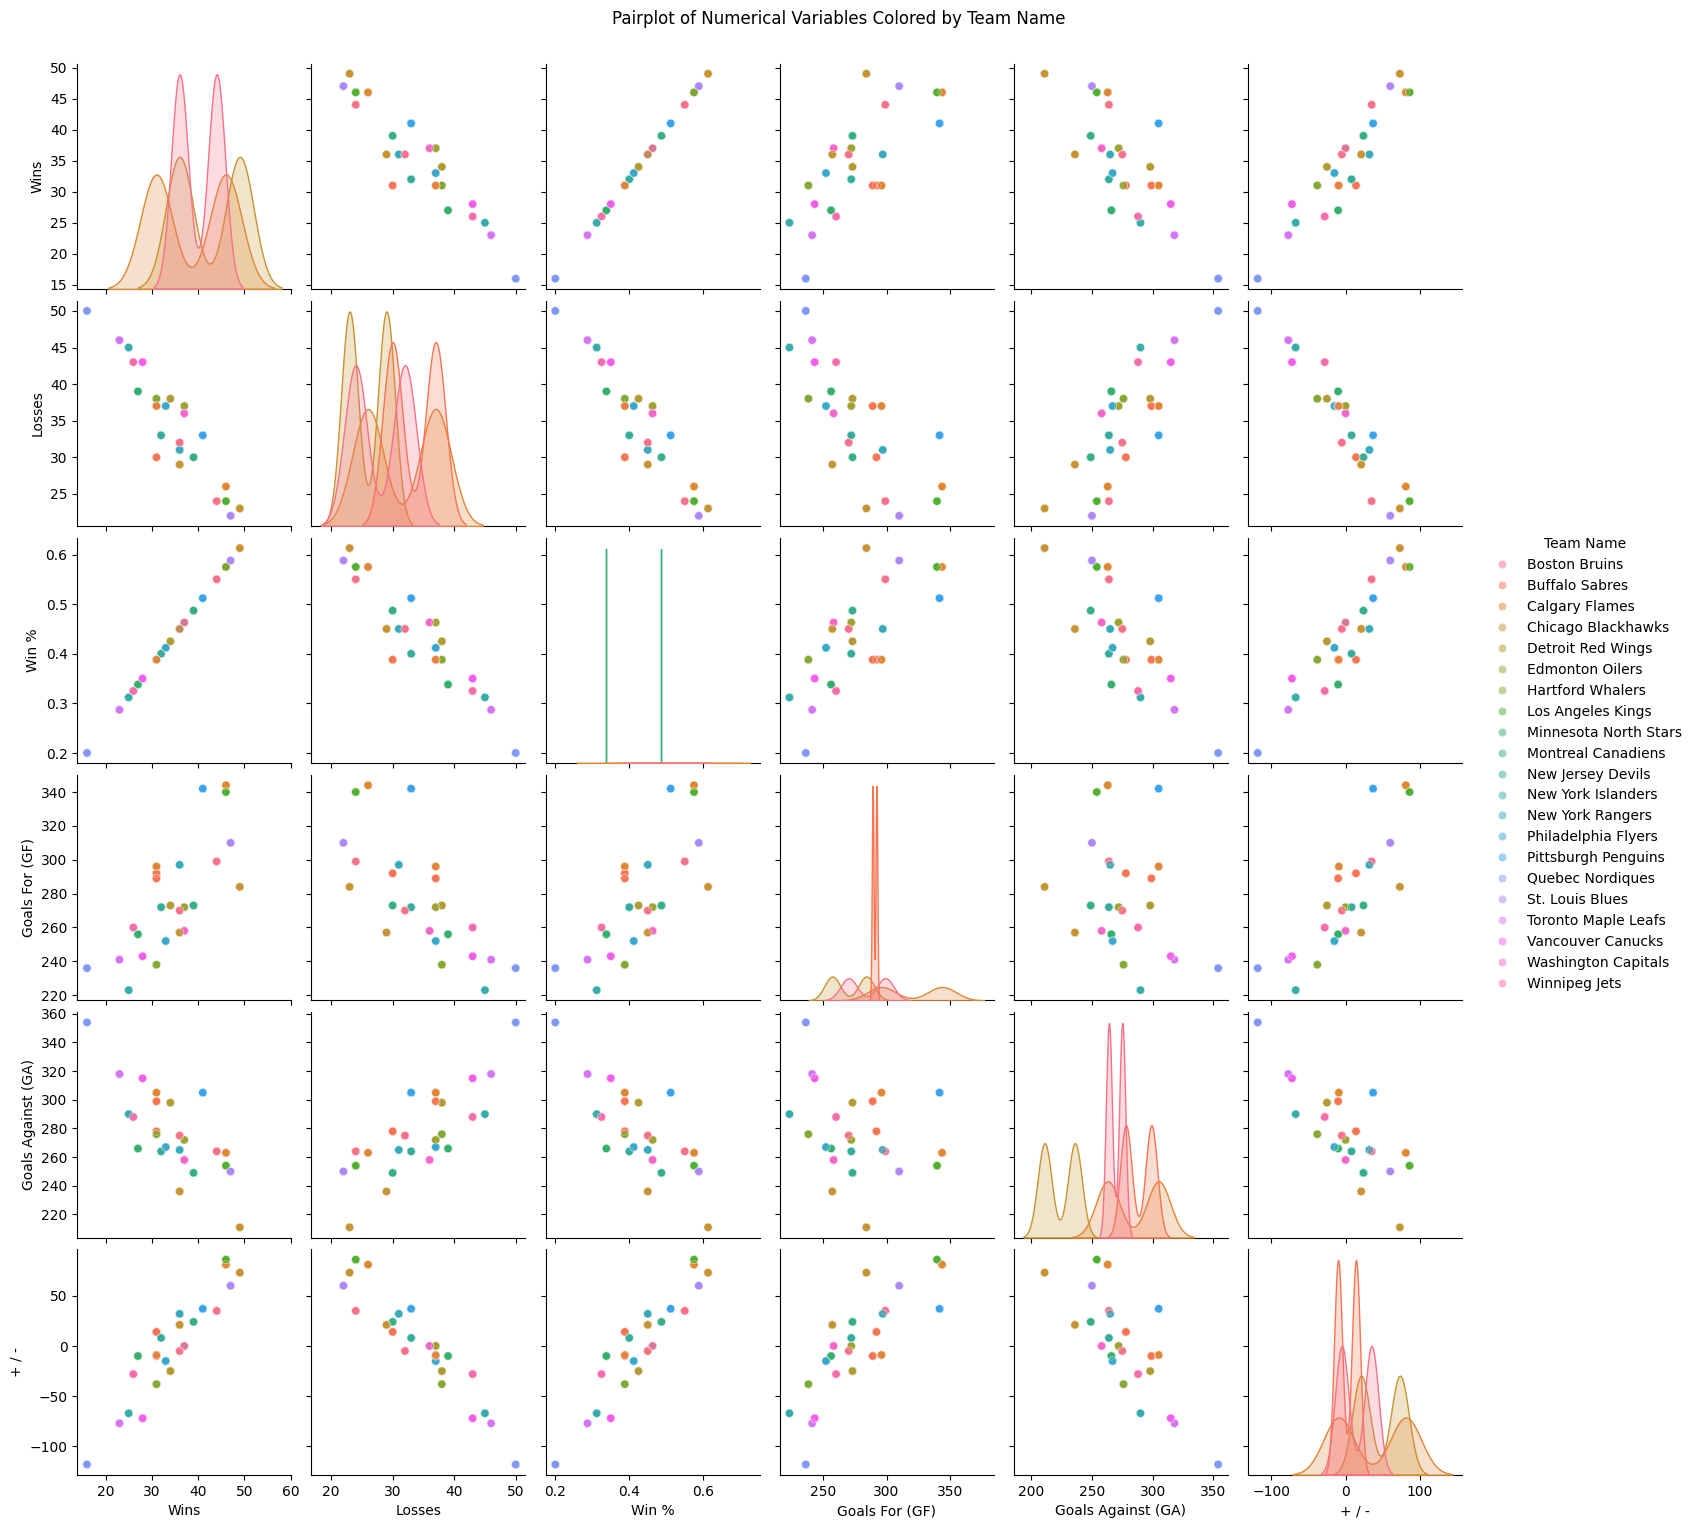

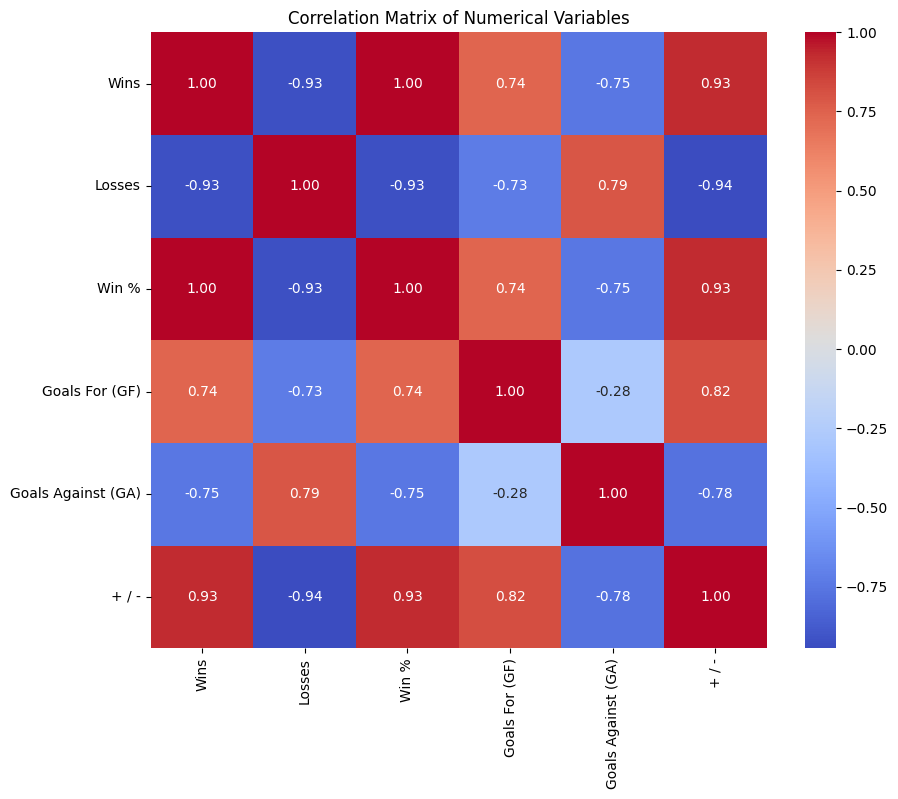

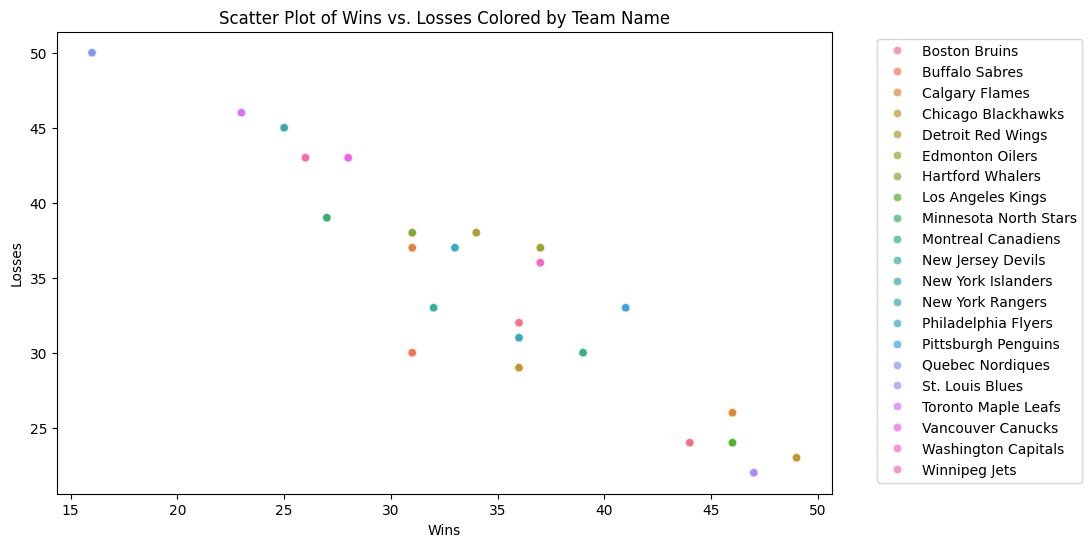

In [34]:
# Multivariate Analysis for numerical variables with pairplot colored by Team Name
plt.figure(figsize=(12, 8))
sns.pairplot(combined_df, vars=numerical_cols, hue='Team Name', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numerical Variables Colored by Team Name', y=1.02)
plt.show()

# Multivariate Analysis for numerical variables with heatmap of correlation matrix colored by Team Name
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Multivariate Analysis for categorical variable (Team Name) and numerical variables (Wins and Losses)
# Scatter plot of Wins vs. Losses colored by Team Name
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wins', y='Losses', hue='Team Name', data=combined_df, alpha=0.7)
plt.title('Scatter Plot of Wins vs. Losses Colored by Team Name')
plt.xlabel('Wins')
plt.ylabel('Losses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
